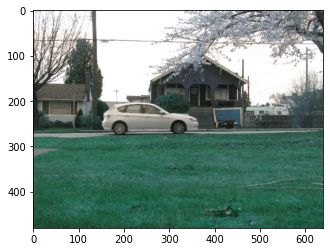

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('../input/computer-vision-course/imagenes/car.jpg')
plt.imshow(img)

Gray Scale of Image

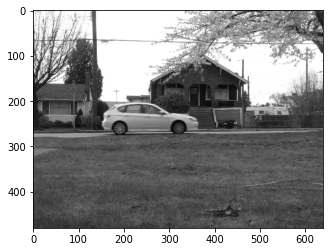

In [2]:
imgs = cv2.imread('../input/computer-vision-course/imagenes/car.jpg',0)
plt.imshow(imgs,cmap='gray')

Define Threshold Of image with more example

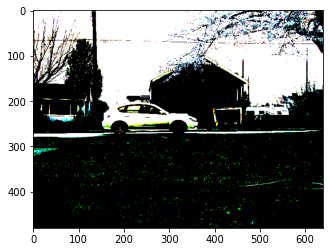

In [3]:
ret,th1 = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
plt.imshow(th1)

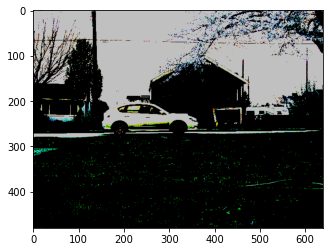

In [4]:
ret,th2 = cv2.threshold(img,128,192,cv2.THRESH_BINARY)
plt.imshow(th2)

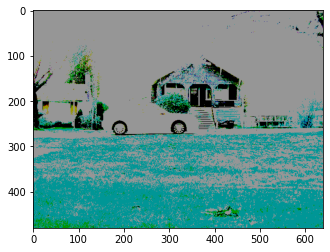

In [5]:
ret,th3 = cv2.threshold(img,50,150,cv2.THRESH_BINARY)
plt.imshow(th3)

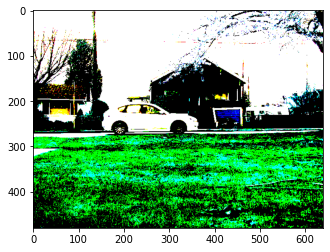

In [6]:
ret,th4 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
plt.imshow(th4)

Image with RGB image channels

Text(0.5, 0.98, 'Original & RGB image channels')

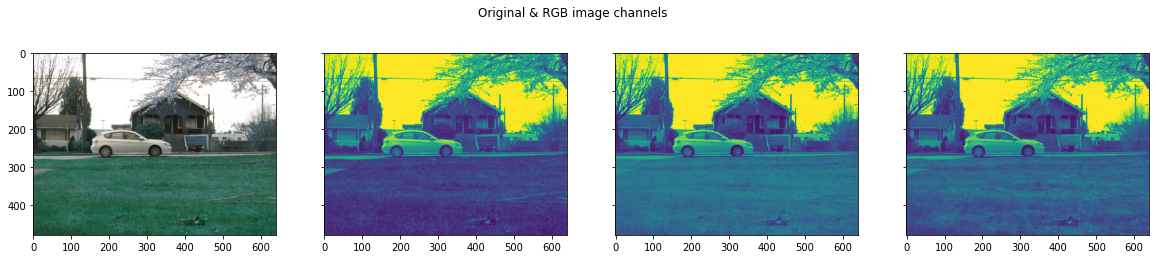

In [7]:
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(img)  #Original image
im2.imshow(img[:, : , 0]) #Red
im3.imshow(img[:, : , 1]) #Green
im4.imshow(img[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

Change Brightness

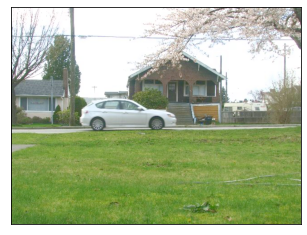

In [8]:
hsvImg = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
value = 50
vValue = hsvImg[...,2]
hsvImg[...,2]=np.where((255-vValue)<value,255,vValue+value)
plt.subplot(111), plt.imshow(cv2.cvtColor(hsvImg,cv2.COLOR_HSV2RGB))
plt.xticks([]), plt.yticks([])
plt.show()

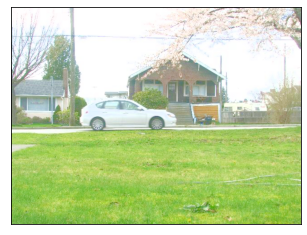

In [9]:
hsvImg = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
value = 100
vValue = hsvImg[...,2]
hsvImg[...,2]=np.where((255-vValue)<value,255,vValue+value)
plt.subplot(111), plt.imshow(cv2.cvtColor(hsvImg,cv2.COLOR_HSV2RGB))
plt.xticks([]), plt.yticks([])
plt.show()

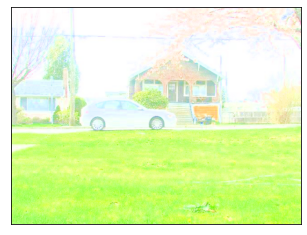

In [10]:
hsvImg = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
value = 180
vValue = hsvImg[...,2]
hsvImg[...,2]=np.where((255-vValue)<value,255,vValue+value)
plt.subplot(111), plt.imshow(cv2.cvtColor(hsvImg,cv2.COLOR_HSV2RGB))
plt.xticks([]), plt.yticks([])
plt.show()

Define Edges with More Example

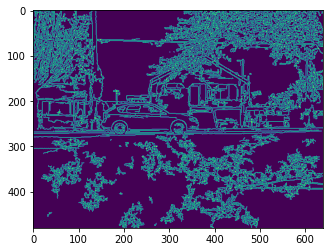

In [11]:
edges = cv2.Canny(image=img, threshold1=0, threshold2=255)
plt.imshow(edges)

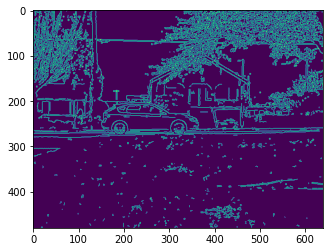

In [12]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=200)
plt.imshow(edges)

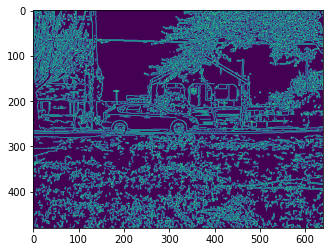

In [13]:
med_val = np.median(img) 
lower = int(max(0, 0.7* med_val))
upper = int(min(255,1.3 * med_val))
edges = cv2.Canny(image=img, threshold1=lower , threshold2=upper)
plt.imshow(edges)

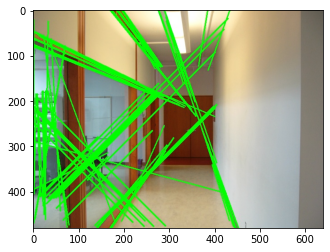

In [14]:
img1 = cv2.imread('../input/computer-vision-course/imagenes/corridor_hough.jpg')
plt.imshow(img1)

Blurring of Image

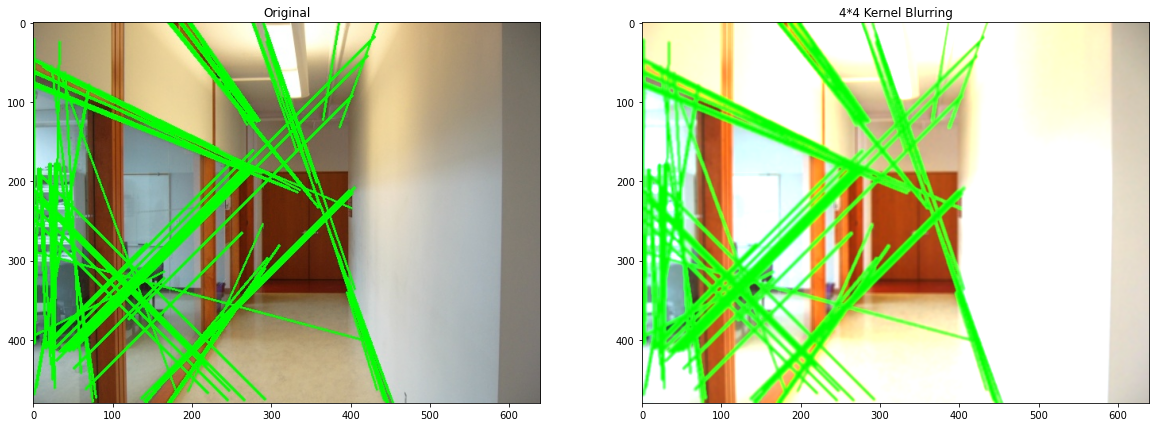

In [15]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(img1)
kernel_3x = np.ones((4, 4), np.float32) / 9
blurred = cv2.filter2D(img1, -1, kernel_3x)
plt.subplot(2, 2, 2)
plt.title("4*4 Kernel Blurring")
plt.imshow(blurred)

Gradient of Image (Soblex, Sobely, Laplacian)

In [16]:
sobelx = cv2.Sobel(img1,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img1,cv2.CV_64F,0,1,ksize=5)
laplacian = cv2.Laplacian(img1,cv2.CV_64F)

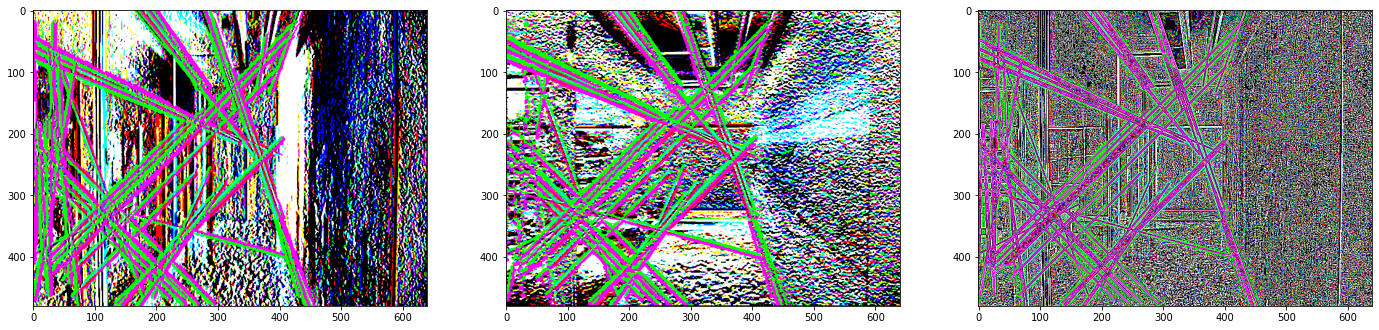

In [17]:
fig, ax = plt.subplots(1,3, figsize=(24,12))
ax[0].imshow(sobelx)
ax[1].imshow(sobely)
ax[2].imshow(laplacian)

Blended of image

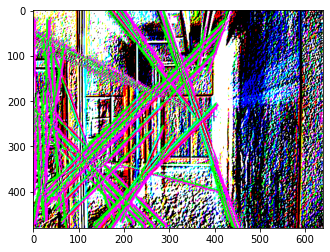

In [18]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.7,src2=sobely,beta=0.3,gamma=2)
plt.imshow(blended)

Histogram Equalization of image

In [19]:
from skimage import exposure
equalize = exposure.equalize_hist(img)
equalize1 = exposure.equalize_hist(img1)

/opt/conda/lib/python3.7/site-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


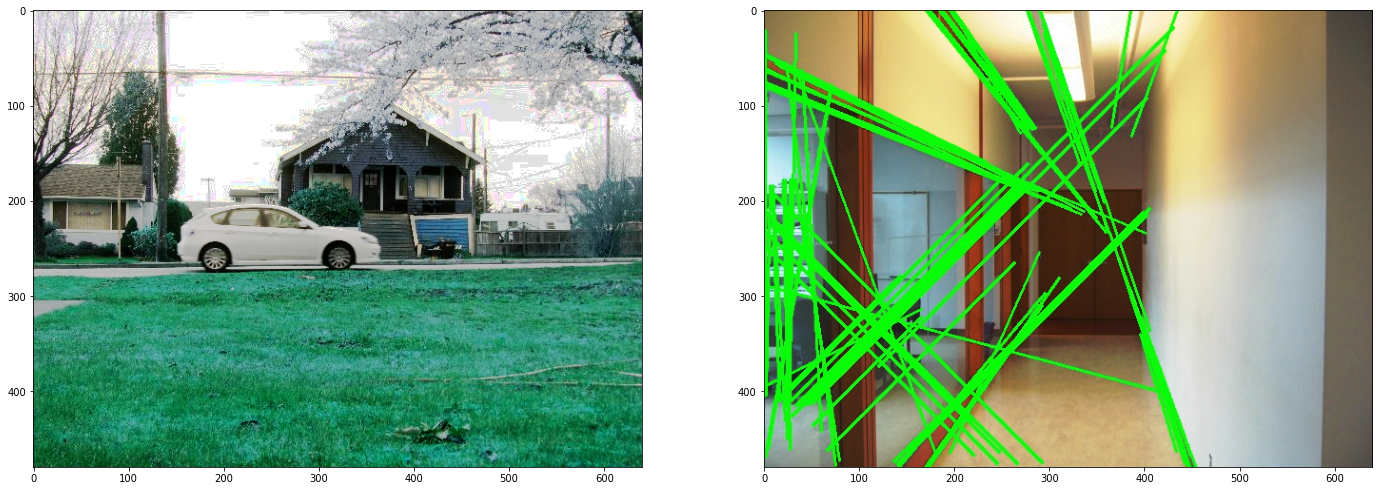

In [20]:
fig, ax = plt.subplots(1,2, figsize=(24,12))
ax[0].imshow(equalize)
ax[1].imshow(equalize1)

3 Color Histogram of image

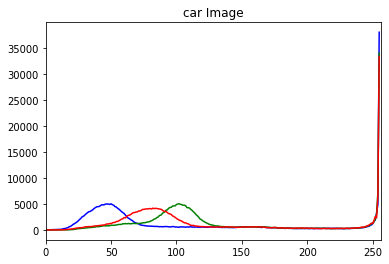

In [21]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('car Image')
plt.show()

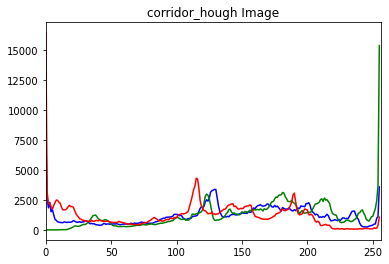

In [22]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('corridor_hough Image')
plt.show()

Add noise in image

In [23]:
noise_im=np.zeros((480, 640),dtype=np.uint8)
cv2.randu(noise_im,0,255)
noise_im=cv2.threshold(noise_im,200,255,cv2.THRESH_BINARY)[1]

(480, 640)


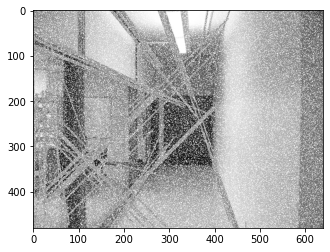

In [24]:
im_gray=cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
plt.imshow(im_gray)
print(im_gray.shape)
in_img=cv2.add(im_gray,noise_im)
plt.imshow(in_img,cmap='gray')

Text(0.5, 1.0, 'After Median Filter')

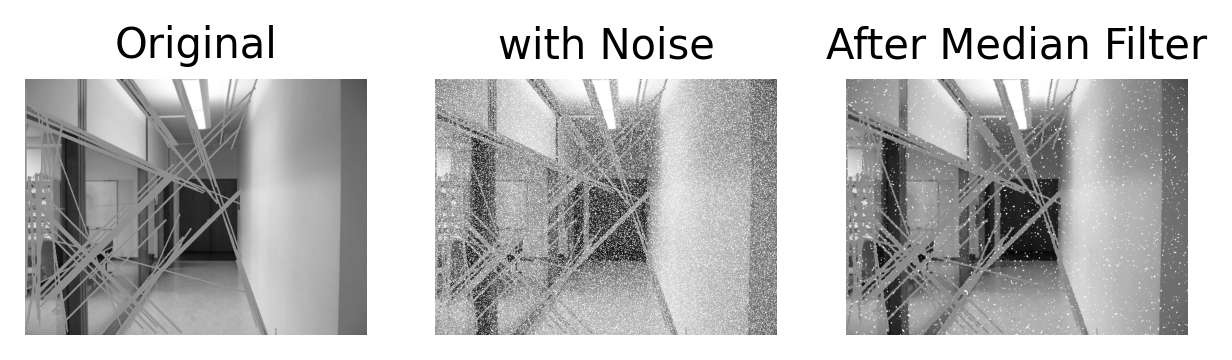

In [25]:
blurred=cv2.medianBlur(in_img,3)
fig=plt.figure(dpi=250)
fig.add_subplot(1,3,1)
plt.imshow(im_gray,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(in_img,cmap='gray')
plt.axis("off")
plt.title("with Noise")

fig.add_subplot(1,3,3)
plt.imshow(blurred,cmap='gray')
plt.axis("off")
plt.title("After Median Filter")

Felzenszwalb’s Segmentation of image

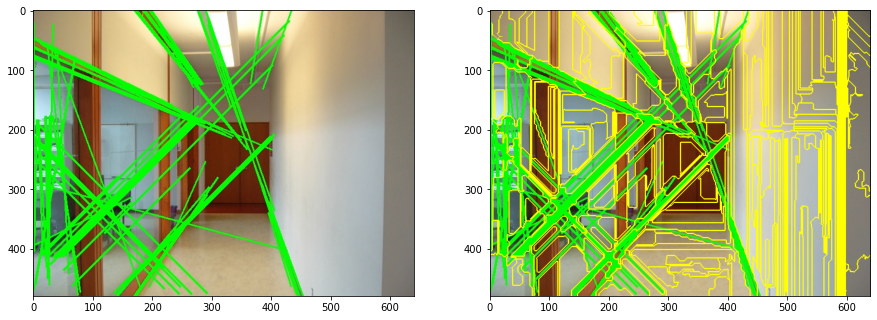

In [26]:
from skimage.segmentation import felzenszwalb, mark_boundaries
from skimage.color import label2rgb
plt.figure(figsize=(15,15))

corridor_hough_segments = felzenszwalb(img1,scale = 2,sigma=4,min_size=350)
plt.subplot(1,2,1)
plt.imshow(img1)

plt.subplot(1,2,2)
plt.imshow(mark_boundaries(img1,corridor_hough_segments))
plt.show()

 segmented image with marking boundaries method.

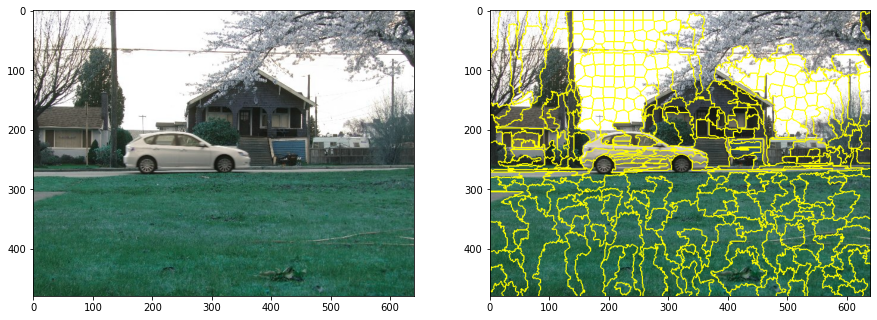

In [27]:
from skimage.segmentation import slic, mark_boundaries
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
car_segments = slic(img,n_segments=1200,compactness=2)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(img, car_segments))
plt.show()

Simple Linear Iterative Clustering of image

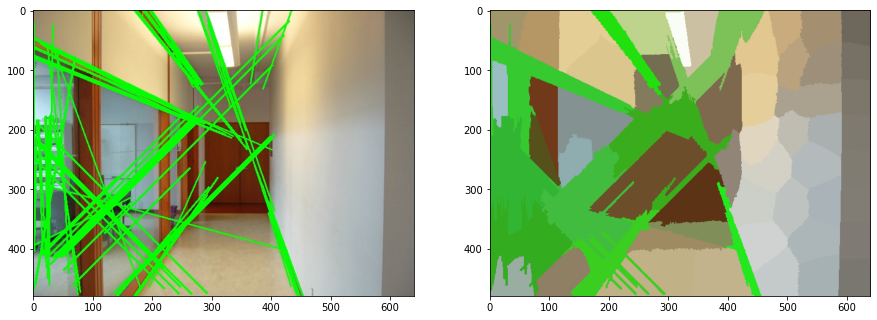

In [28]:
from skimage.segmentation import slic
from skimage.color import label2rgb
 
plt.figure(figsize=(15,15))

car_segments = slic(img1,
                          n_segments=90,
                          compactness=10)
plt.subplot(1,2,1)
 
plt.imshow(img1)
plt.subplot(1,2,2)

plt.imshow(label2rgb(car_segments,
                     img1,
                     kind = 'avg'))

Segmentation image by Thresholding  Using skimage.filters module

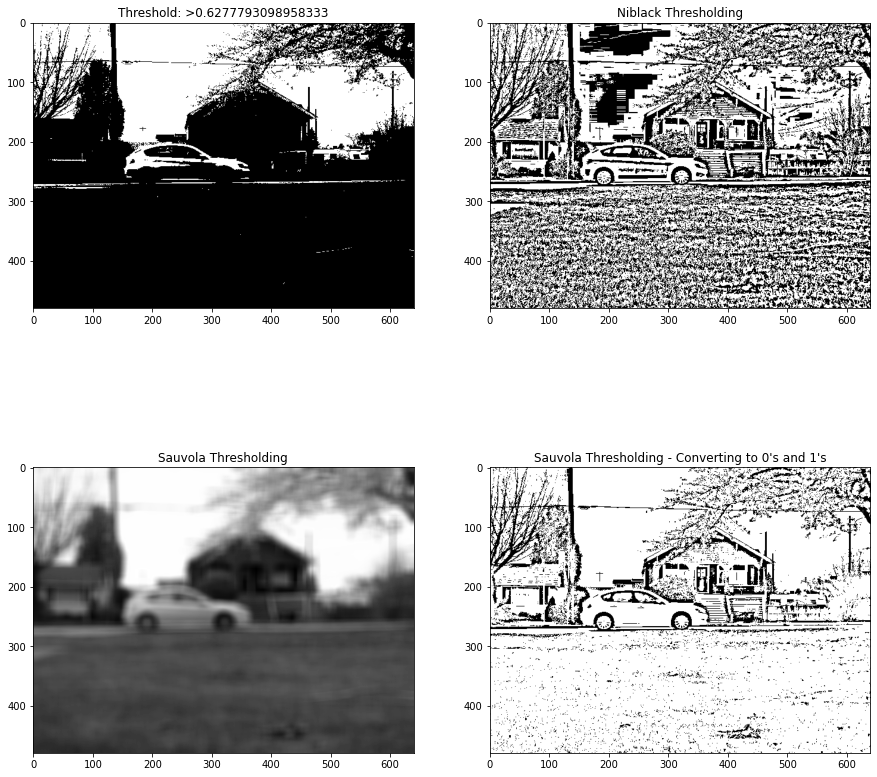

In [29]:
from skimage import filters
from skimage.color import rgb2gray
 
plt.figure(figsize=(15, 15))
 
gray_car = rgb2gray(img)
 
threshold = filters.threshold_otsu(gray_car)
 
binarized_car = (gray_car > threshold)*1
plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))
 
plt.imshow(binarized_car, cmap = "gray")
 
threshold = filters.threshold_niblack(gray_car)
 
binarized_car = (gray_car > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")
 
plt.imshow(binarized_car, cmap = "gray")
 
threshold = filters.threshold_sauvola(gray_car)
plt.subplot(2,2,3)
plt.title("Sauvola Thresholding")
 
plt.imshow(threshold, cmap = "gray")
 
binarized_car = (gray_car > threshold)*1
plt.subplot(2,2,4)
plt.title("Sauvola Thresholding - Converting to 0's and 1's")
 
plt.imshow(binarized_car, cmap = "gray")